# Statistics Advanced - 2 | Assignment Solutions

### Question 1: What is hypothesis testing in statistics?

**Answer:**
Hypothesis testing is a formal, quantitative procedure for using sample data to evaluate competing claims (hypotheses) about a population parameter.
Typically, we start with a **null hypothesis (H₀)** that represents the status quo or a specific claimed value of a parameter, and an **alternative hypothesis (H₁/Ha)** that represents a competing claim. We then compute a test statistic from the sample and compare it against a reference distribution to obtain a p‑value or a critical‑value decision. If the evidence provided by the sample is sufficiently strong (p‑value ≤ α), we **reject H₀** in favor of **H₁**; otherwise, we **fail to reject H₀**.

### Question 2: What is the null hypothesis, and how does it differ from the alternative hypothesis?

**Answer:**
- **Null hypothesis (H₀):** A specific statement about a population parameter that represents no effect, no difference, or the status quo (e.g., μ = 50). It is the claim we try to find evidence **against**.
- **Alternative hypothesis (H₁/Ha):** The complementary claim we want to find evidence **for** (e.g., μ ≠ 50, μ > 50, or μ < 50). It states that an effect or difference **does** exist.
They differ in direction and purpose: H₀ is the default assumption; Ha is concluded only if sample evidence is strong enough to reject H₀.

### Question 3: Explain the significance level in hypothesis testing and its role in deciding the outcome of a test.

**Answer:**
The **significance level** (α) is the pre‑chosen threshold for how much evidence against H₀ is required to reject it—commonly 0.05 or 0.01. If the **p‑value ≤ α**, we reject H₀; otherwise, we fail to reject H₀. In other words, α controls the long‑run probability of making a **Type I error** (incorrectly rejecting a true H₀).

### Question 4: What are Type I and Type II errors? Give examples of each.

**Answer:**
- **Type I error (False Positive):** Rejecting a true H₀. Example: Concluding a new drug works when in reality it does not. Probability of this error is α.
- **Type II error (False Negative):** Failing to reject a false H₀. Example: Concluding a new drug does not work when in reality it does. Probability of this error is β (and power = 1 − β).

### Question 5: What is the difference between a Z-test and a T-test? Explain when to use each.

**Answer:**
- **Z‑test:** Used when the population standard deviation (σ) is **known** *or* the sample size is large and the Central Limit Theorem applies. The test statistic follows the standard normal distribution.
- **t‑test:** Used when σ is **unknown** and we estimate it with the sample standard deviation (s). The test statistic follows a **Student’s t** distribution with appropriate degrees of freedom.
In practice: use a t‑test for most small/medium samples with unknown σ; use a Z‑test when σ is known or sample size is large and normality assumptions are reasonable.

### Question 6: Write a Python program to generate a binomial distribution with n=10 and p=0.5, then plot its histogram.

**Answer (Code):**

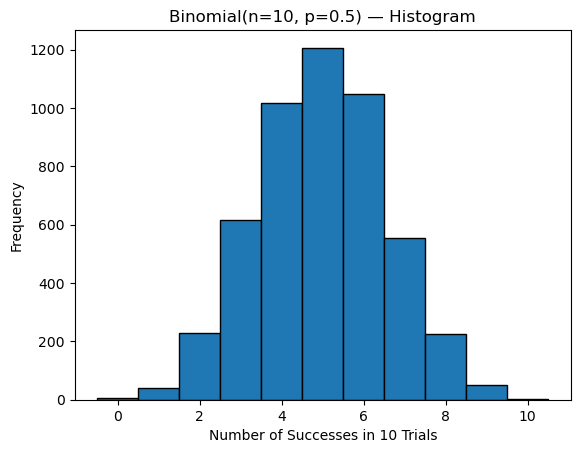

Sample mean ≈ 4.982, theoretical mean = 5.000
Sample var  ≈ 2.506, theoretical var  = 2.500


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Reproducibility
np.random.seed(42)

# Parameters
n = 10
p = 0.5
size = 5000  # number of simulated trials

# Generate binomial data
data = np.random.binomial(n=n, p=p, size=size)

# Plot histogram
plt.figure()
plt.hist(data, bins=np.arange(-0.5, n+1.5, 1), edgecolor='black')
plt.title('Binomial(n=10, p=0.5) — Histogram')
plt.xlabel('Number of Successes in 10 Trials')
plt.ylabel('Frequency')
plt.show()

print(f"Sample mean ≈ {data.mean():.3f}, theoretical mean = {n*p:.3f}")
print(f"Sample var  ≈ {data.var(ddof=0):.3f}, theoretical var  = {n*p*(1-p):.3f}")

### Question 7: Implement hypothesis testing using Z-statistics for a sample dataset in Python. Show the Python code and interpret the results.

**Answer (Code + Interpretation):**
We test H₀: μ = 50 vs Ha: μ ≠ 50 (two‑sided). For a Z‑test we assume a known population standard deviation (σ). Below we set σ = 1.0 for demonstration.

**Interpretation:** If the p‑value is less than or equal to 0.05, we reject H₀ and conclude the mean differs from 50. Otherwise, we do not have sufficient evidence to say it differs from 50 given the assumed σ.

In [2]:
import numpy as np
import math

sample_data = [49.1, 50.2, 51.0, 48.7, 50.5, 49.8, 50.3, 50.7, 50.2, 49.6,
               50.1, 49.9, 50.8, 50.4, 48.9, 50.6, 50.0, 49.7, 50.2, 49.5,
               50.1, 50.3, 50.4, 50.5, 50.0, 50.7, 49.3, 49.8, 50.2, 50.9,
               50.3, 50.4, 50.0, 49.7, 50.5, 49.9]

x = np.array(sample_data, dtype=float)
n = x.size
mu0 = 50.0       # hypothesized mean
sigma = 1.0      # assumed known population std for Z-test (adjust if known)

xbar = x.mean()
z_stat = (xbar - mu0) / (sigma / math.sqrt(n))

# standard normal CDF via error function
def phi(z):
    return 0.5 * (1 + math.erf(z / math.sqrt(2)))

# two-sided p-value
p_value = 2 * (1 - phi(abs(z_stat)))

alpha = 0.05
decision = "Reject H0" if p_value <= alpha else "Fail to reject H0"

print(f"n = {n}, x̄ = {xbar:.4f}, σ (assumed known) = {sigma:.3f}")
print(f"Z statistic = {z_stat:.4f}")
print(f"Two-sided p-value = {p_value:.6f}")
print(f"Decision at α = {alpha}: {decision}")

n = 36, x̄ = 50.0889, σ (assumed known) = 1.000
Z statistic = 0.5333
Two-sided p-value = 0.593803
Decision at α = 0.05: Fail to reject H0


### Question 8: Write a Python script to simulate data from a normal distribution and calculate the 95% confidence interval for its mean. Plot the data using Matplotlib.

**Answer (Code):**

Sample mean = 9.862, Sample sd = 2.485, n = 400
95% CI for μ: [9.618, 10.105] (using z* = 1.96)


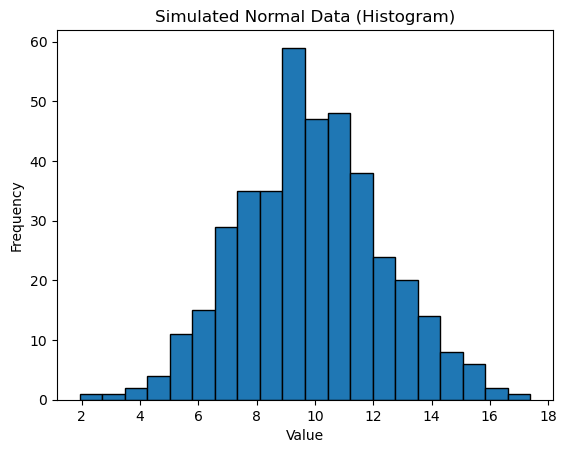

In [5]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(123)

#Simulate from Normal(mu, sigma)
mu_true = 10.0
sigma_true = 2.5
n = 400

data = np.random.normal(loc=mu_true, scale=sigma_true, size=n)

# 95% CI for the population mean using z* ≈ 1.96 and sample standard error
xbar = data.mean()
s = data.std(ddof=1)
se = s / np.sqrt(n)
z_star = 1.96
ci_low, ci_high = xbar - z_star*se, xbar + z_star*se

print(f"Sample mean = {xbar:.3f}, Sample sd = {s:.3f}, n = {n}")
print(f"95% CI for μ: [{ci_low:.3f}, {ci_high:.3f}] (using z* = 1.96)")

# Plot histogram of the simulated data
plt.figure()
plt.hist(data, bins=20, edgecolor='black')
plt.title('Simulated Normal Data (Histogram)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

### Question 9: Write a Python function to calculate the Z-scores from a dataset and visualize the standardized data using a histogram. Explain what the Z-scores represent in terms of standard deviations from the mean.

**Answer (Code + Explanation):**

Mean (original) = 9.862, SD (original) = 2.482
Z-scores: mean ≈ -3.642e-16, sd ≈ 1.000 (should be ~0 and 1)


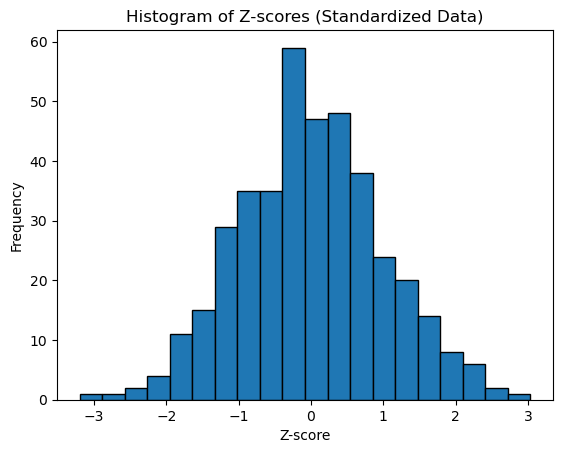

Interpretation: A Z-score indicates how many standard deviations a value lies above (+) or below (−) the dataset mean; e.g., z = 1.0 is one SD above the mean.


In [8]:
import numpy as np
import matplotlib.pyplot as plt

def zscores(arr):
    arr = np.asarray(arr, dtype=float)
    mu = arr.mean()
    sd = arr.std(ddof=0)  # population sd for standardization; use ddof=1 for sample sd
    return (arr - mu) / sd, mu, sd

# Example dataset (reuse data from Q8 for illustration)
z, mu, sd = zscores(data)

print(f"Mean (original) = {mu:.3f}, SD (original) = {sd:.3f}")
print(f"Z-scores: mean ≈ {z.mean():.3e}, sd ≈ {z.std(ddof=0):.3f} (should be ~0 and 1)")

# Plot histogram of Z-scores
plt.figure()
plt.hist(z, bins=20, edgecolor='black')
plt.title('Histogram of Z-scores (Standardized Data)')
plt.xlabel('Z-score')
plt.ylabel('Frequency')
plt.show()

print("Interpretation: A Z-score indicates how many standard deviations a value lies above (+) or below (−) the dataset mean; e.g., z = 1.0 is one SD above the mean.")